# Importing requierd packages and libraries

In [22]:
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter

In [3]:
%matplotlib inline 
rcParams ['figure.figsize']=5,4
#sb.set_style['whitegrid']


# DBSCAN clustring to identify ouliers

In [4]:
df=pd.read_csv(r'C:\Users\Maryam\Downloads\IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
data=df.iloc[:,:4]

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
data[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
db=DBSCAN(eps=0.8, min_samples=19)

In [98]:
model=db.fit(data)

In [115]:
model

DBSCAN(eps=0.8, min_samples=19)

In [118]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [100]:
outliers_df=pd.DataFrame(data)
print(Counter(model.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [101]:
print(outliers_df[model.labels_==-1])

     sepal_length  sepal_width  petal_length  petal_width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


In [102]:
sample_core= np.zeros_like(df,dtype=bool)

In [103]:
sample_core[model.labels_!= -1]=True

In [104]:
sample_core

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  Tr

In [105]:
#other way to see the core points
#db.core_sample_indices_
#sample_core[db.core_sample_indices_]=True
#sample_core

# visualzing the clusters 
we can use any combinations of two variables

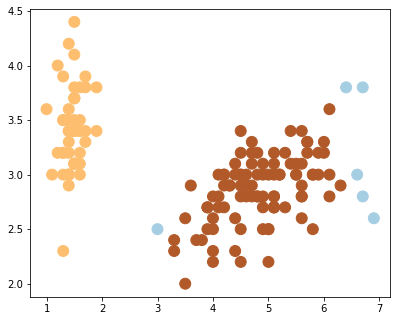

In [109]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
color=model.labels_
ax.scatter(data.iloc[:,2].values,data.iloc[:,1].values,c=color, s=120,)

In [124]:

import matplotlib.pyplot as plt


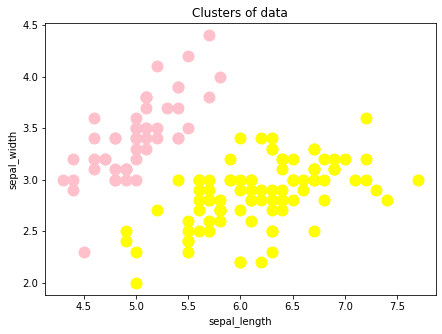

In [125]:

plt.figure(figsize=(7,5))
plt.scatter(data.loc[model.labels_ == 0, 'sepal_length'], data.loc[model.labels_ == 0, 'sepal_width'], s = 120, c = 'pink')
plt.scatter(data.loc[model.labels_ == 1,'sepal_length'], data.loc[model.labels_ == 1, 'sepal_width'], s = 120, c = 'yellow')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clusters of data')
plt.show()

In [127]:
from sklearn.metrics import silhouette_score

In [130]:
silhouette_score(data, db.fit_predict(data))
        

0.5480337016029767

# How to imporve the clusters?

In [136]:
# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.98, step=0.01)
min_sample_list=np.arange(start=2, stop=100, step=1)
 

In [137]:
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 

In [138]:
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(data)))>1):
            sil_score=silhouette_score(data, db.fit_predict(data))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.686393,eps:0.9 min_sample :10


In [139]:
db=DBSCAN(eps=0.9, min_samples=10)

In [140]:
model=db.fit(data)

In [142]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### we can see that it eliminate the outliers and calcuted the score that is why our score is much better

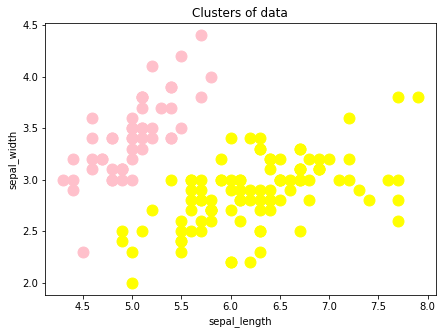

In [141]:

plt.figure(figsize=(7,5))
plt.scatter(data.loc[model.labels_ == 0, 'sepal_length'], data.loc[model.labels_ == 0, 'sepal_width'], s = 120, c = 'pink')
plt.scatter(data.loc[model.labels_ == 1,'sepal_length'], data.loc[model.labels_ == 1, 'sepal_width'], s = 120, c = 'yellow')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clusters of data')
plt.show()

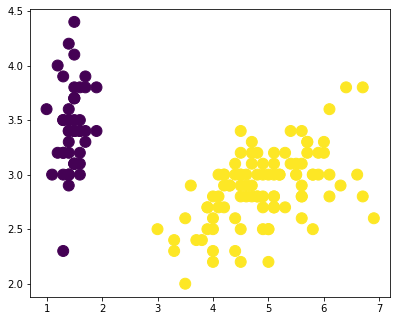

In [143]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
color=model.labels_
ax.scatter(data.iloc[:,2].values,data.iloc[:,1].values,c=color, s=120)

### in fact if we apply the silhouette_score on the core data which is clustered at the begining we can see the same score

In [154]:
data[model.labels_!= -1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [155]:
silhouette_score(data[model.labels_!= -1], db.fit_predict(data[model.labels_!= -1]))

0.6863930543445408